<a href="https://colab.research.google.com/github/Pathin220/4105_ML/blob/main/4105_newHw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [470]:
file_path = '/content/drive/My Drive/Machine Learning/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [471]:

# Separate features and labels
X1 = sample.values[:, 0]  # get input values from first column -- X is a list here
X2 = sample.values[:, 1]  # get input values from first column -- X is a list here
X3 = sample.values[:, 2]  # get input values from first column -- X is a list here
Y = sample.values[:, 3]  # get output values from second column -- Y is the list here
m = len(Y)  # Number of training examples
n1 = len(X1)  # Number of training examples
n2 = len(X2)  # Number of training examples
n3 = len(X3)  # Number of training examples




In [472]:
from IPython.display import display
display(sample)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


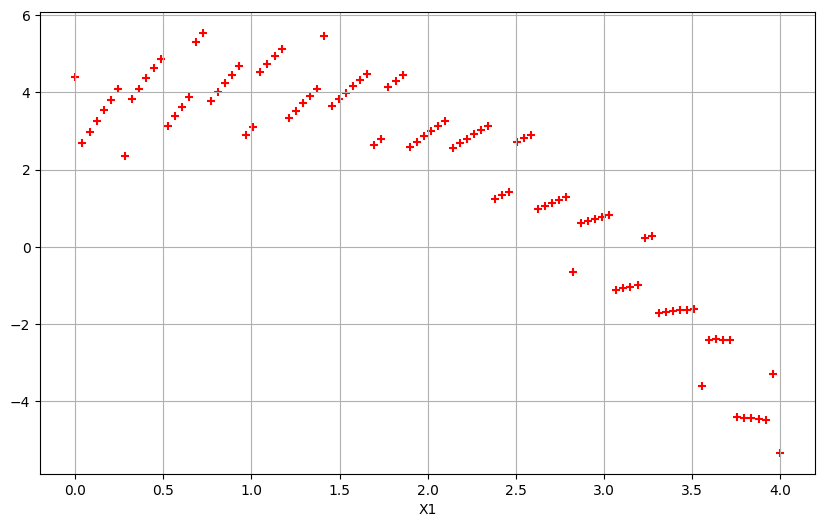

In [473]:

X1 = sample.values[:, 0]  # get input values from first column -- X1
Y = sample.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X1, Y, color='red', marker='+')


# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X1')

# Show the plot
plt.show()

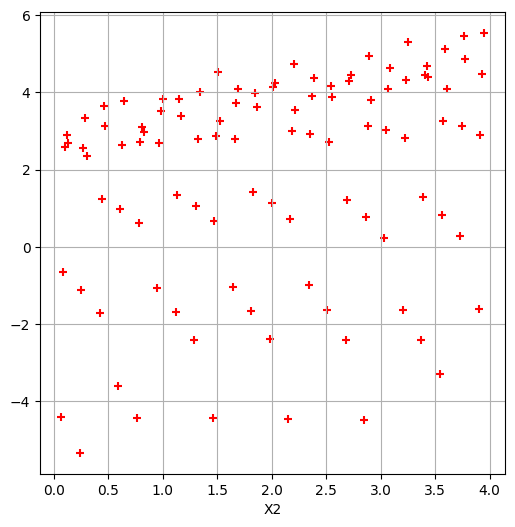

In [474]:
X2 = sample.values[:, 1]  # get input values from first column -- X2
Y = sample.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X2, Y, color='red', marker='+')


# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X2')

# Show the plot
plt.show()

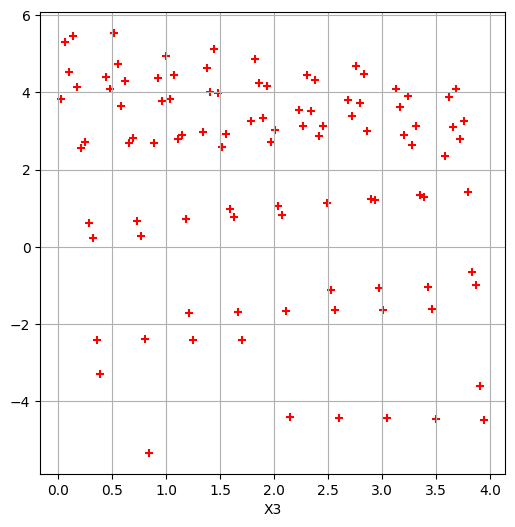

In [475]:

X3 = sample.values[:, 2]  # get input values from first column -- X3
Y = sample.values[:, 3]  # get output values from the second column --  Y is a list here which is a 2 dimentional array

# Scatter plot
plt.scatter(X3, Y, color='red', marker='+')


# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X3')

# Show the plot
plt.show()

In [476]:
# creating a column of vector of ones , reshaping features (X1) to make it a 2D array, stacking X_1_1 and X_1 to create final feature matrix X.
X_1_1 = np.ones((m, 1))
X_1 = X1.reshape(m, 1)
X1 = np.hstack((X_1_1, X_1))
# Create theta for X1
theta1 = np.zeros(2)

In [477]:
# creating a column of vector of ones , reshaping features (X2) to make it a 2D array, stacking X_2_1 and X_2 to create final feature matrix X.
X_2_1 = np.ones((m, 1))
X_2 = X2.reshape(m, 1)
X2 = np.hstack((X_2_1, X_2))
# Create theta for X2
theta2 = np.zeros(2)

In [478]:
# creating a column of vector of ones , reshaping features (X3) to make it a 2D array, stacking X_3_1 and X_3 to create final feature matrix X.
X_3_1 = np.ones((m, 1))
X_3 = X3.reshape(m, 1)
X3 = np.hstack((X_3_1, X_3))
# Create theta for X3
theta3 = np.zeros(2)

In [479]:

def compute_cost(X, Y, theta):
    """
    Compute for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [480]:
# Lets compute the cost for theta values
cost = compute_cost(X, Y, theta)


In [481]:
def gradient_descent(X, Y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    compute_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(Y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


In [482]:

theta = [0., 0.]
iterations = 1500
alpha = 0.01

In [483]:

theta_1, cost_history = gradient_descent(X1, Y, theta, alpha, iterations)
theta_2, cost_history_2 = gradient_descent(X2, Y, theta, alpha, iterations)
theta_3, cost_history_3 = gradient_descent(X3, Y, theta, alpha, iterations)



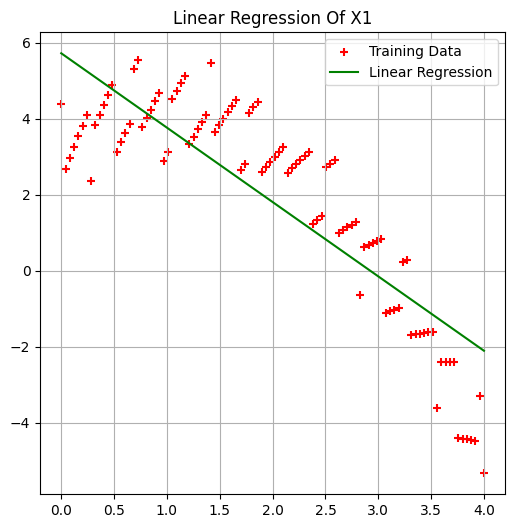

In [484]:

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X1[:, 1], Y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X1[:, 1], X1.dot(theta_1), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.title('Linear Regression Of X1')
plt.legend()

# Show the plot
plt.show()

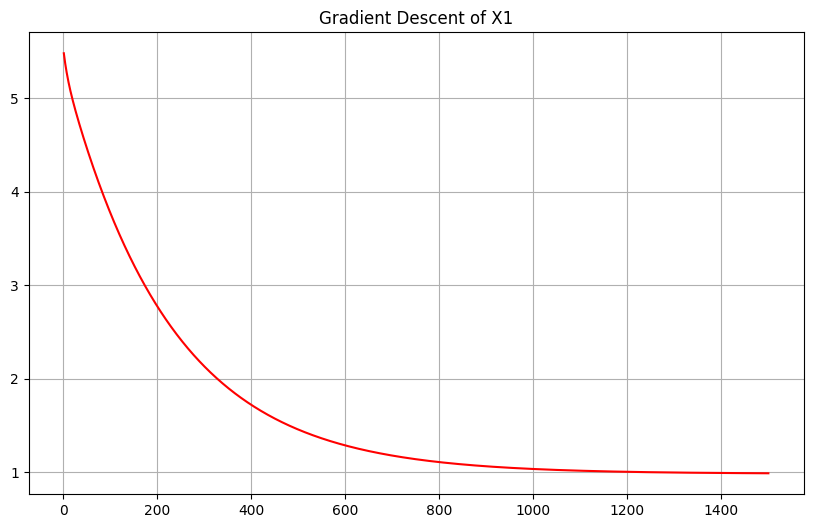

In [485]:

plt.plot(range(1, iterations + 1), cost_history, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)


plt.title('Gradient Descent of X1')

# Show the plot
plt.show()

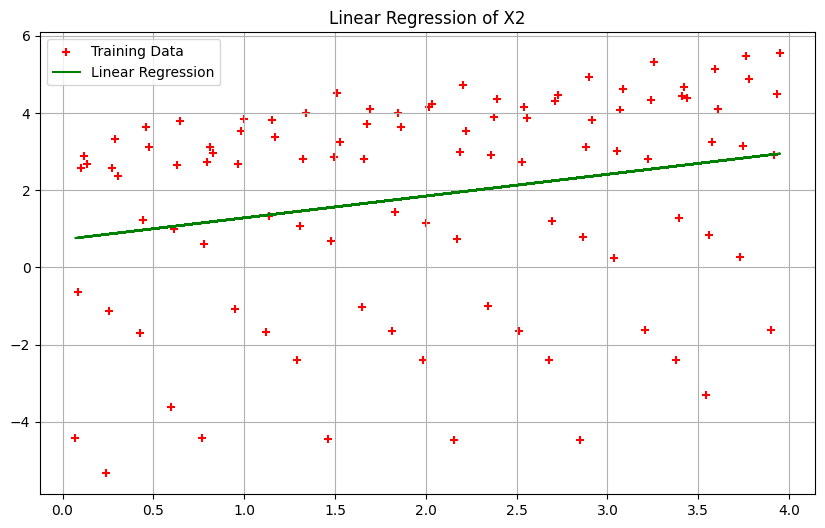

In [486]:

# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X2[:, 1], Y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X2[:, 1], X2.dot(theta_2), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.title('Linear Regression of X2')
plt.legend()

# Show the plot
plt.show()

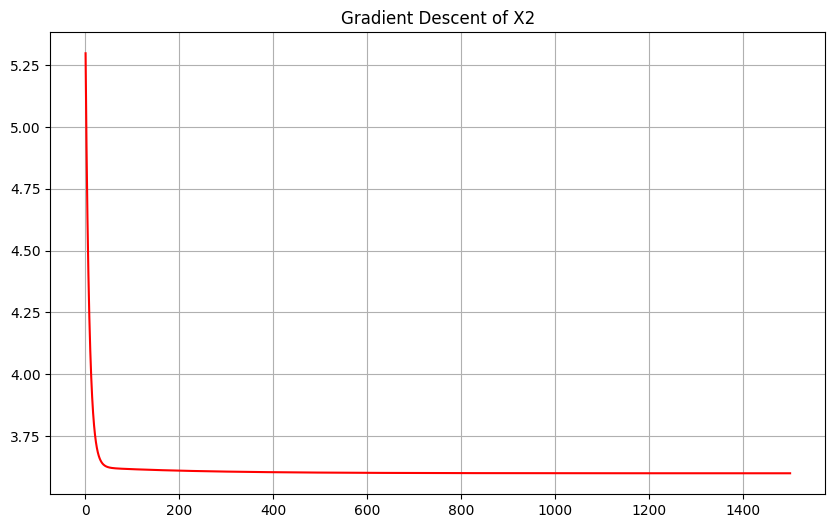

In [487]:
plt.plot(range(1, iterations + 1), cost_history_2, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)


plt.title('Gradient Descent of X2')

# Show the plot
plt.show()

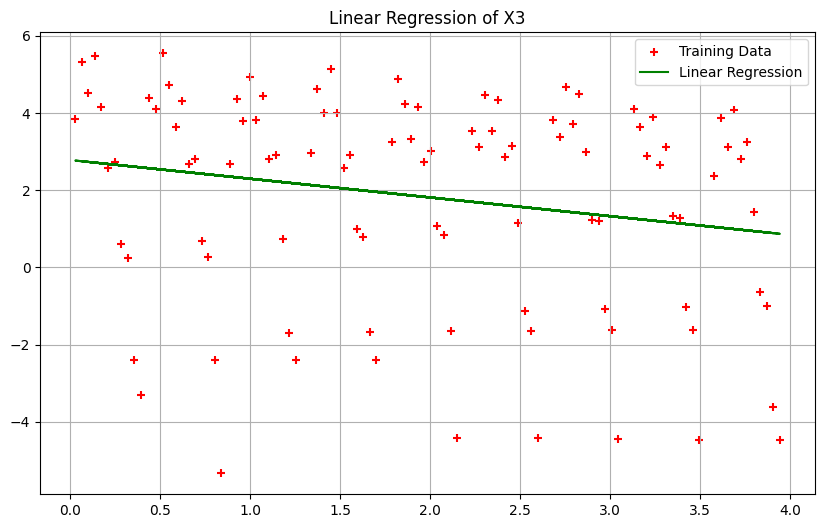

In [488]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X3[:, 1], Y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X3[:, 1], X3.dot(theta_3), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.title('Linear Regression of X3')
plt.legend()

# Show the plot
plt.show()

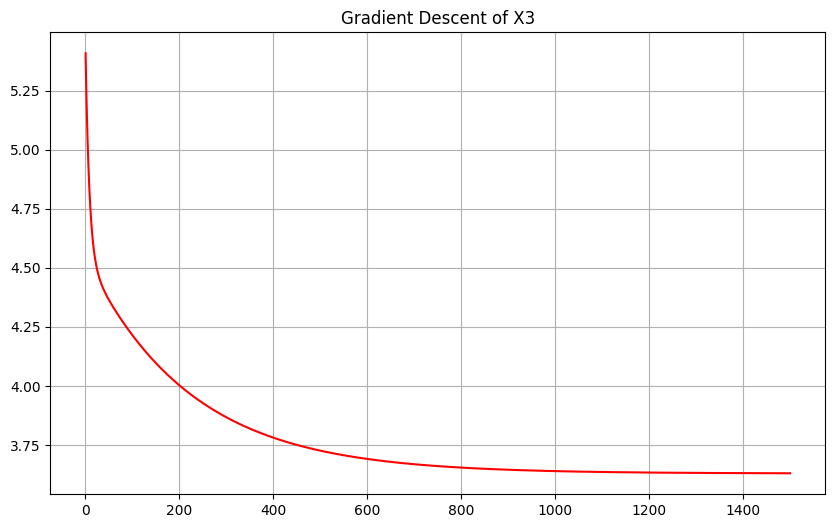

In [489]:
plt.plot(range(1, iterations + 1), cost_history_3, color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)


plt.title('Gradient Descent of X3')

# Show the plot
plt.show()

In [490]:

X4 = np.hstack((X_1_1, X_2_1, X_3_1))
theta_4 = np.zeros(4)


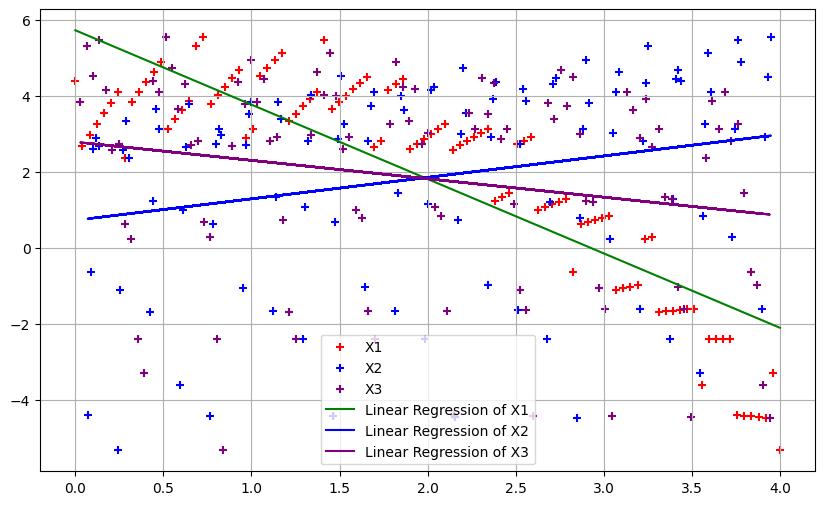

In [491]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X1[:, 1], Y, color='red', marker='+', label='X1')
plt.scatter(X2[:, 1], Y, color='blue', marker='+', label='X2')
plt.scatter(X3[:, 1], Y, color='purple', marker='+', label='X3')


# Line plot for the linear regression model
plt.plot(X1[:, 1], X1.dot(theta_1), color='green', label='Linear Regression of X1')
plt.plot(X2[:, 1], X2.dot(theta_2), color='blue', label='Linear Regression of X2')
plt.plot(X3[:, 1], X3.dot(theta_3), color='purple', label='Linear Regression of X3')


# Plot customizations
plt.grid(True)
plt.legend()
plt.show()